<a href="https://colab.research.google.com/github/GeorgeKMaina/Price-Prediction-Regression-Analysis/blob/main/PRICE_PREDICITION_REGRESSION_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRICE PREDICTION ANALYSIS

1. Defining the Research Objective

a) Specifying the Data Analytic question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

b) Stating the model Used

2. Recording the Experimental Design

a) Coming up with the Research Question

Coming up with a model that can be used to predict house prices

b) Cleaning the Dataset

- Consistency
- Completeness
- Validity
- Uniformity
- Anomalies

c) Carrying out Univariate, Bivariate and Multivariate Analysis 

d) Modelling to get the predicition 

3. Metrics of Success

- To get the model with the least error and the highest R-squared score

4. Relevance of the Dataset

- The data provided has some features that can be used to preict house prices
-The dataset to use for this project can be found by following this link: [http://bit.ly/IndependentProjectWeek7Dataset].

# IMPORTING THE LIBRARIES TO USE

In [1]:
#libraries to load the dataset and do data cleaning
import pandas as pd
import numpy as np
#libraries used for plotting
import matplotlib.pyplot as plt
import seaborn as sns
#libraries used for features reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#libraries to split the data and do cross validation
from sklearn.model_selection import train_test_split #libraries used to split the data into train and test
from sklearn.model_selection import KFold #library used for cross validation
from sklearn.model_selection import cross_val_score  #library used for cross validation


#libraries used for modelling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import statsmodels.formula.api as smf

#libraries used to measure the performance of the model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings

warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# IMPORTING THE DATASET

In [2]:
df=pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

## preview of the dataset and its features

In [3]:
#the first 5 rows of the datset
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#the last 5 rows of the dataset
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
#looking at the shape of the dataset
print('shape of the dataset',df.shape) 

print('the dataset has ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns')

shape of the dataset (21613, 20)
the dataset has 21613 rows and 20 columns


In [6]:
#looking at the datatypes of the columns and the number of observations in each of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [7]:
df.drop(['id','lat','long','zipcode','yr_built'],axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540182.158793,367362.231718,75000.0,321950.00,450000.00,645000.0,7700000.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
sqft_lot,21613.0,15106.967566,41420.511515,520.0,5040.00,7618.00,10688.0,1651359.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5
waterfront,21613.0,0.007542,0.086517,0.0,0.00,0.00,0.0,1.0
view,21613.0,0.234303,0.766318,0.0,0.00,0.00,0.0,4.0
condition,21613.0,3.409430,0.650743,1.0,3.00,3.00,4.0,5.0
grade,21613.0,7.656873,1.175459,1.0,7.00,7.00,8.0,13.0


In [8]:
#we will look for number of unique observations in each of the columns
for i in df:
  print(i,df[i].nunique())
  print('\n')

id 21436


price 3625


bedrooms 13


bathrooms 30


sqft_living 1038


sqft_lot 9782


floors 6


waterfront 2


view 5


condition 5


grade 12


sqft_above 946


sqft_basement 306


yr_built 116


yr_renovated 70


zipcode 70


lat 5034


long 752


sqft_living15 777


sqft_lot15 8689




In [9]:
cols=df[['view','floors','waterfront','condition','grade','yr_built','yr_renovated']]
for i in cols:
  print(i,cols[i].unique())
  print('\n')

view [0 3 4 2 1]


floors [1.  2.  1.5 3.  2.5 3.5]


waterfront [0 1]


condition [3 5 4 1 2]


grade [ 7  6  8 11  9  5 10 12  4  3 13  1]


yr_built [1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934
 1938 1919 1906 1935]


yr_renovated [   0 1991 2002 2010 1999 1992 2013 1994 1978 2005 2008 2003 1984 1954
 2014 2011 1974 1983 1945 1990 1988 1957 1977 1981 1995 2000 1998 1970
 1989 2004 1986 2009 2007 1987 1973 2006 1985 2001 1980 1971 1979 1997
 1950 1969 1948 2015 1968 2012

# DATA CLEANING

## Consistency

In [10]:
#we will look for duplicated rows in the dataset
print('number of duplicated rows in the dataset: ',df.duplicated().sum())

#we will drop the duplicated rows and only retain the first record
df.drop_duplicates(keep='first',inplace=True)

number of duplicated rows in the dataset:  3


## completness

In [11]:
# we will look for columns with missing values
df.isna().sum()

#the columns in the dataset have no missing values
#this is a clean dataset

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## validity

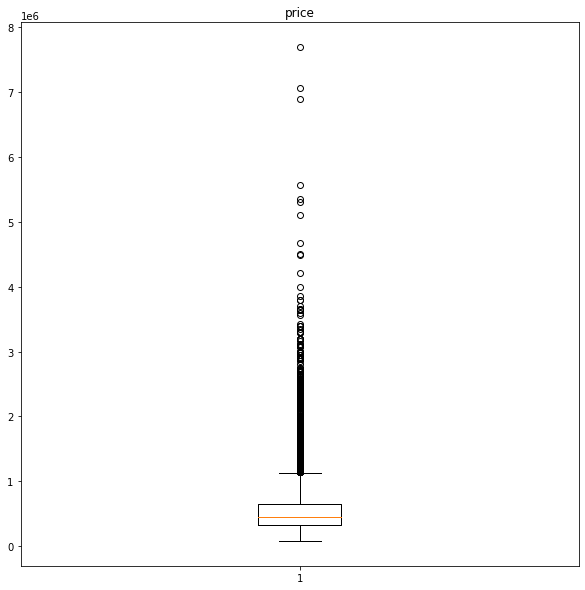

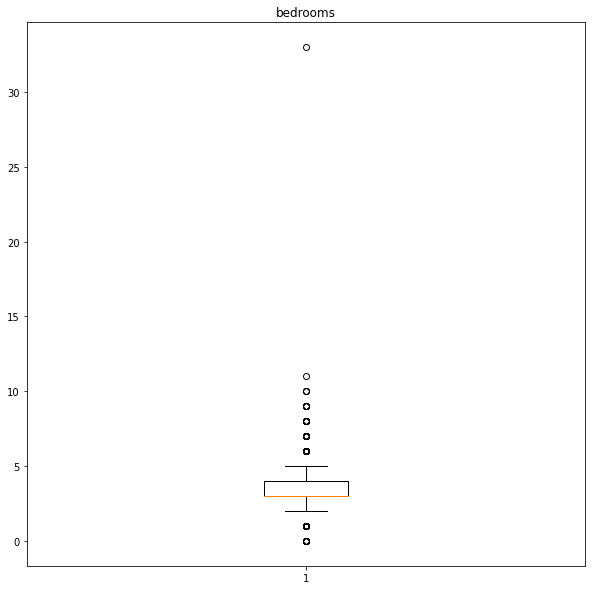

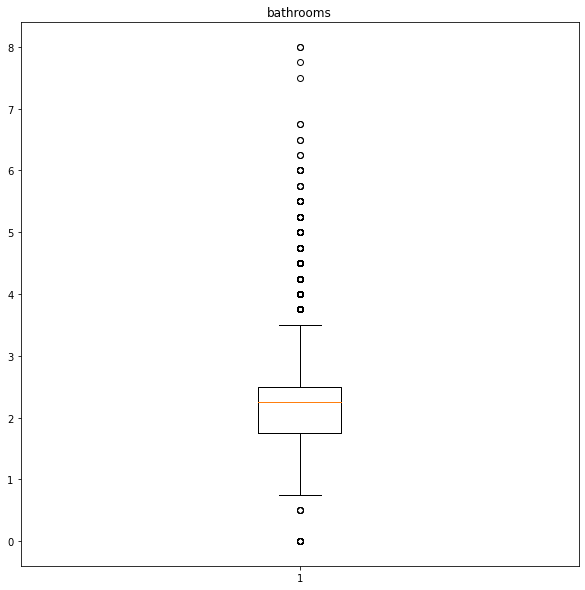

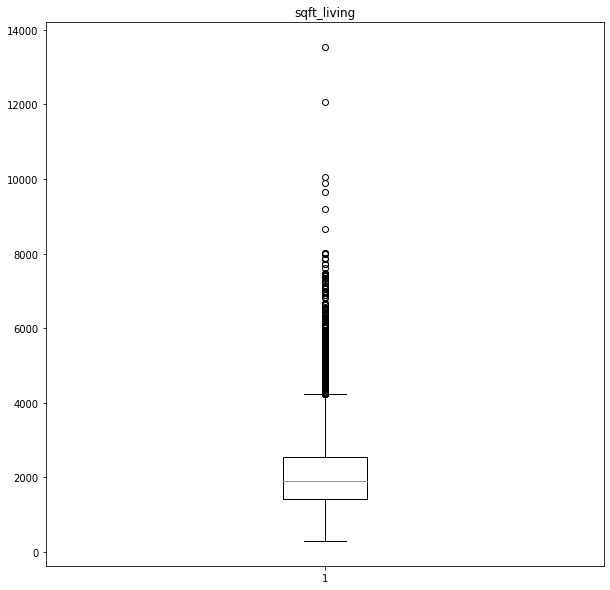

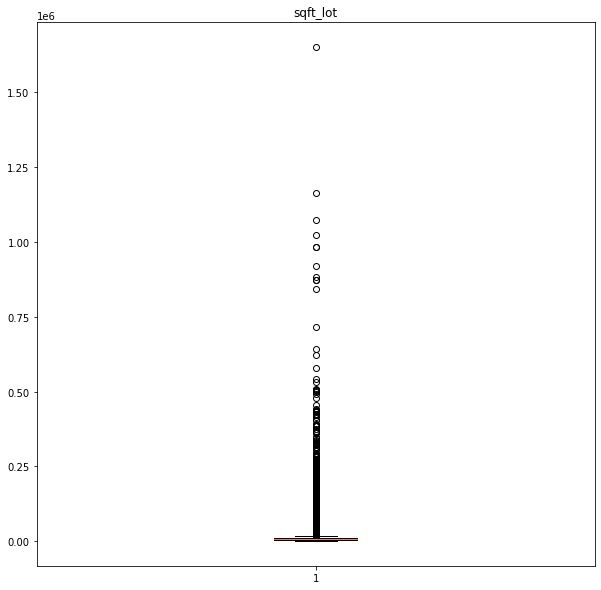

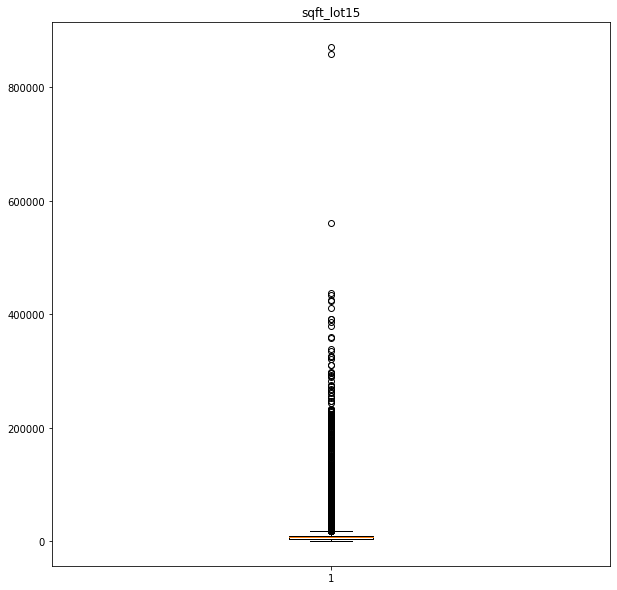

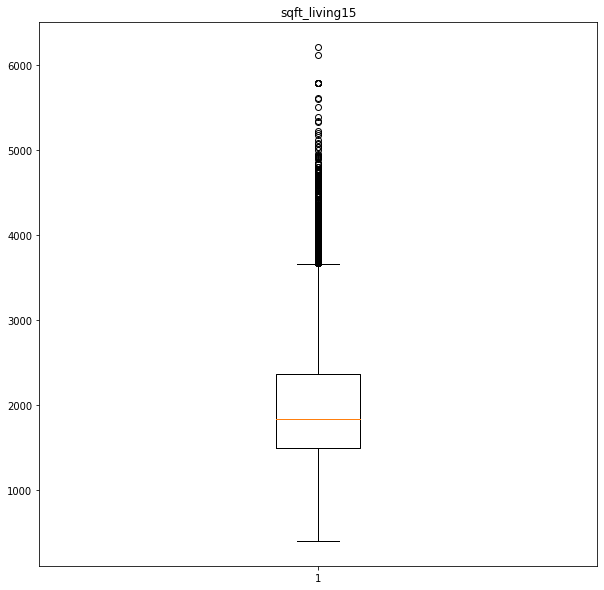

In [12]:
#we will look for outliers in the dataset
cols=df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','sqft_lot15','sqft_living15']]
for i in cols:
  fig, ax = plt.subplots(1,1, figsize=(10, 10))
  plt.boxplot(cols[i])
  ax.set_title('%s'%i)
plt.show()

In [13]:
# dealing with outliers
# quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(df1.shape)

# Printing the shape of our old dataset
print(df.shape)

(14935, 20)
(21610, 20)


In [14]:
df['price']=df['price'].astype(int)

In [15]:
#we will drop some columns that cannot be of help to us when prediciting house prices
df.drop(['id','lat','long','zipcode'],axis=1,inplace=True)

In [16]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

# uniformity

In [17]:
#removing whitespaces if there are any
df.columns.str.strip()

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

# EDA

## Univariate Analysis

##### price

In [18]:
#get descriptive stats for the columns price
df.price.describe()

count    2.161000e+04
mean     5.401789e+05
std      3.673876e+05
min      7.500000e+04
25%      3.216125e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [19]:
#getting the skweness and kurtosis of the column price
print('kurtosis of column price', df['price'].kurt()) # the kurtosis of a normally distributed variable is 3
print('skweness of column price', df['price'].skew()) # the skweness of a normally distributed variable is 0

#the column price is not distributed based on the kurtosis and skweness

kurtosis of column price 34.517437729615054
skweness of column price 4.021467451317612


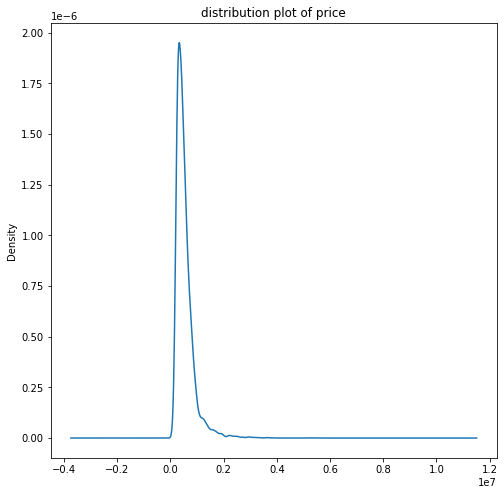

In [20]:
#we will plot a distribution plot
df['price'].plot(kind='kde',figsize=(8,8))
plt.title('distribution plot of price')
plt.show()

In [21]:
#calculating the shapiro wilk test
from scipy.stats import shapiro
data=df['price']
stat,p=shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.712, p=0.000
Sample does not look Gaussian


##### Bedrooms

In [22]:
#looking at the descrptive statistics of the column bedrooms
df['bedrooms'].describe()

count    21610.000000
mean         3.370847
std          0.930110
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

3     9822
4     6881
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


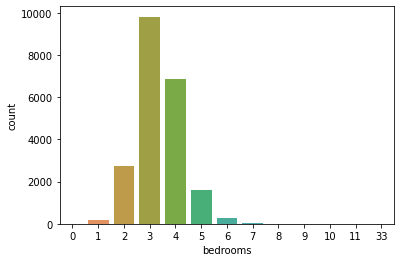

In [23]:
print(df['bedrooms'].value_counts())

sns.countplot(x=df['bedrooms'],data=df)
plt.show()

kurtosis of column price 49.06010825423431
skweness of column price 1.9742435470953739


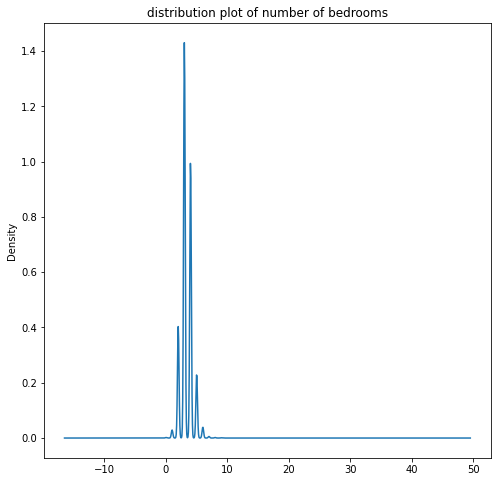

In [24]:
#getting the skweness and kurtosis of the column price
print('kurtosis of column price', df['bedrooms'].kurt()) # the kurtosis of a normally distributed variable is 3
print('skweness of column price', df['bedrooms'].skew()) # the skweness of a normally distributed variable is 0


#we will plot a distribution plot
df['bedrooms'].plot(kind='kde',figsize=(8,8))
plt.title('distribution plot of number of bedrooms')
plt.show()


# we can see that the data is not even close to being normally distributed

In [25]:
#performing shapiro wilk test on this column
data=df['bedrooms']
stat,p=shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.849, p=0.000
Sample does not look Gaussian


##### bathrooms

In [26]:
print(df['bathrooms'].unique())
#the number of bathrooms cannot be a float
#we will therefore round off the values to the nearest whole number
df['bathrooms']=df['bathrooms'].round()
df['bathrooms']=df['bathrooms'].astype(int)

[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]


In [27]:
df['bathrooms'].describe()

count    21610.000000
mean         2.058723
std          0.755576
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          8.000000
Name: bathrooms, dtype: float64

2    13848
1     3933
3     2527
4     1201
5       57
6       24
0       14
8        4
7        2
Name: bathrooms, dtype: int64


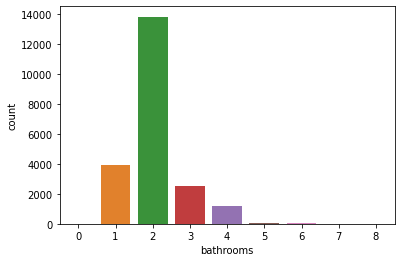

In [28]:
print(df['bathrooms'].value_counts())

sns.countplot(x=df['bathrooms'],data=df)
plt.show()

kurtosis of column price 2.746983075214263
skweness of column price 1.0837995486347805


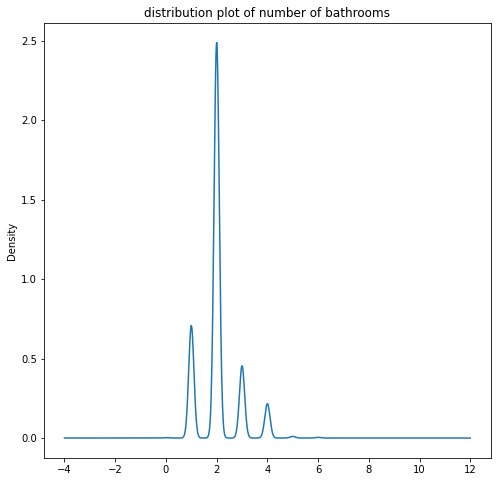

In [29]:
#getting the skweness and kurtosis of the column bathrooms
print('kurtosis of column price', df['bathrooms'].kurt()) # the kurtosis of a normally distributed variable is 3
print('skweness of column price', df['bathrooms'].skew()) # the skweness of a normally distributed variable is 0


#we will plot a distribution plot
df['bathrooms'].plot(kind='kde',figsize=(8,8))
plt.title('distribution plot of number of bathrooms')
plt.show()

#the data is not close to being normally distributed

In [30]:
#we will carry out a shapiro wilk test
data=df['bathrooms']
stat,p=shapiro(data)
print('statistic=%.3f p-value=%.3f'%(stat,p))
# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

statistic=0.770 p-value=0.000
Sample does not look Gaussian


##### square feet of living room

In [31]:
#we will get the number of unique values in the column
print(df['sqft_living'].nunique())

#we will get the descriptive statisitcs 
df['sqft_living'].describe()


1038


count    21610.000000
mean      2079.881212
std        918.500299
min        290.000000
25%       1425.500000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

kurtosis of column sqft_living 5.242222911342459
skweness of column sqft_living 1.4715321846904306


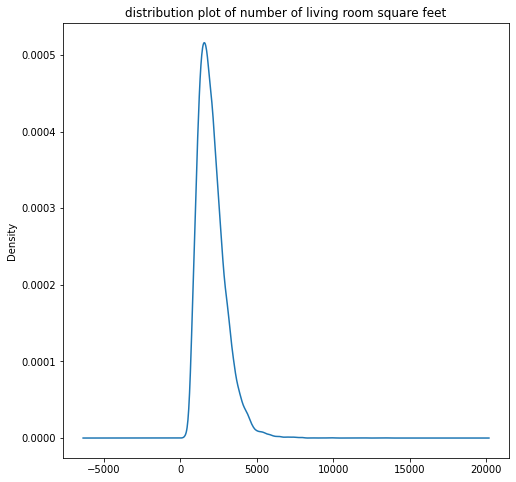

In [32]:
#getting the skweness and kurtosis of the column 'sqft_living'
print('kurtosis of column sqft_living', df['sqft_living'].kurt()) # the kurtosis of a normally distributed variable is 3
print('skweness of column sqft_living', df['sqft_living'].skew()) # the skweness of a normally distributed variable is 0


#we will plot a distribution plot
df['sqft_living'].plot(kind='kde',figsize=(8,8))
plt.title('distribution plot of number of living room square feet')
plt.show()

In [33]:
#shapiro test
data=df['sqft_living']
stat,p=shapiro(data)
print('shapiro statistics=%.3f,p-value=%.3f'%(stat,p))

#decision rule
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

shapiro statistics=0.915,p-value=0.000
Sample does not look Gaussian


##### square feet of parking area

In [34]:
#we will get the number of unique values in the column
print(df['sqft_lot'].nunique())

#we will get the descriptive statisitcs 
df['sqft_lot'].describe()

9782


count    2.161000e+04
mean     1.510829e+04
std      4.142323e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.619000e+03
75%      1.068875e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

kurtosis of column sqft_lot 285.0406214916321
skweness of column sqft_lot 13.059170061304911


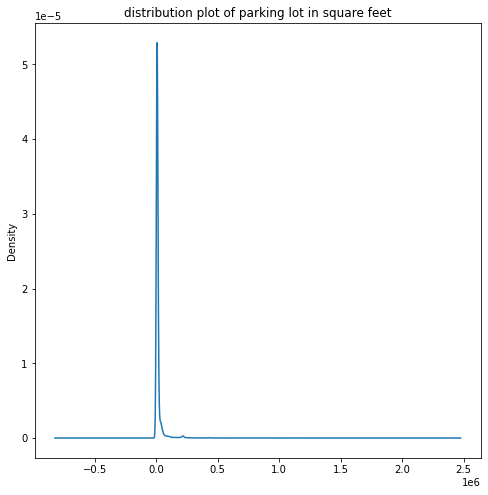

In [35]:
#getting the skweness and kurtosis of the column sqft_lot
print('kurtosis of column sqft_lot', df['sqft_lot'].kurt()) # the kurtosis of a normally distributed variable is 3
print('skweness of column sqft_lot', df['sqft_lot'].skew()) # the skweness of a normally distributed variable is 0


#we will plot a distribution plot
df['sqft_lot'].plot(kind='kde',figsize=(8,8))
plt.title('distribution plot of parking lot in square feet')
plt.show()

In [36]:
#conducting shapiro wilk test for normality
data-df['sqft_lot']
stat,p=shapiro(data)
print('shapiro statistic=%.3f,p-value=%.3f'%(stat,p))

#decision rule
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

shapiro statistic=0.915,p-value=0.000
Sample does not look Gaussian


##### floors

In [37]:
#to look at the unique values in the columns floors
print(df['floors'].unique())

#we cannot have fllors being float numbers
#we will therefore round of the column values into the next whole number and convert it into integer
df['floors']=df['floors'].round()
df['floors']=df['floors'].astype(int)

[1.  2.  1.5 3.  2.5 3.5]


1    10680
2    10309
3      613
4        8
Name: floors, dtype: int64


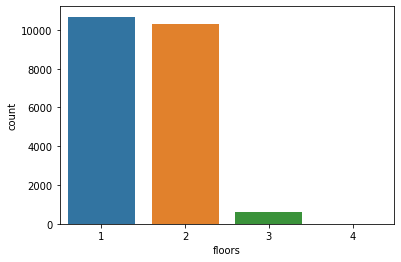

In [38]:
print(df['floors'].value_counts())

sns.countplot(x=df['floors'],data=df)
plt.show()

kurtosis of column floors -0.8124870468103511
skweness of column floors 0.39320446292942524


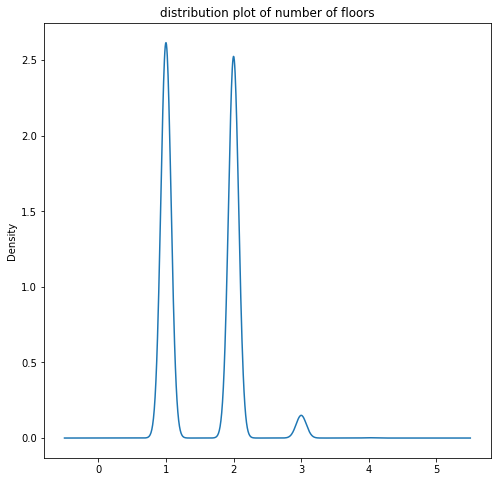

In [39]:
#getting the skweness and kurtosis of the column sqft_lot
print('kurtosis of column floors', df['floors'].kurt()) # the kurtosis of a normally distributed variable is 3
print('skweness of column floors', df['floors'].skew()) # the skweness of a normally distributed variable is 0


#we will plot a distribution plot
df['floors'].plot(kind='kde',figsize=(8,8))
plt.title('distribution plot of number of floors')
plt.show()

In [40]:
data=df['floors']
stat,p=shapiro(data)
print('shapiro statistic=%.3f, p-value=%.3f'%(stat,p))

#decision rule
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

shapiro statistic=0.705, p-value=0.000
Sample does not look Gaussian


##### square feet of basement area

In [41]:
df['sqft_basement'].describe()

count    21610.000000
mean       291.533318
std        442.596699
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

kurtosis of column sqft_basement 2.714885503607166
skweness of column sqft_basement 1.5778143003083518


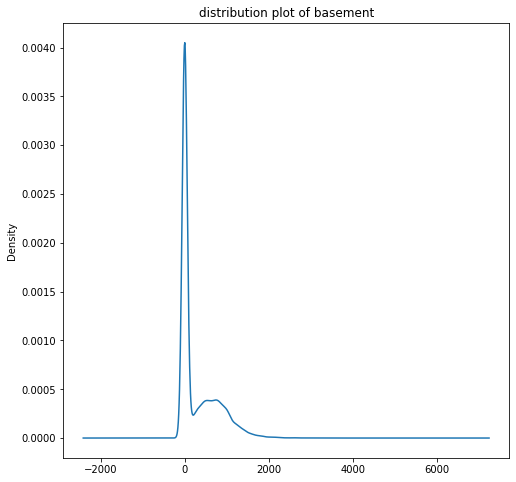

In [42]:
#getting the skweness and kurtosis of the column sqft_lot
print('kurtosis of column sqft_basement', df['sqft_basement'].kurt()) # the kurtosis of a normally distributed variable is 3
print('skweness of column sqft_basement', df['sqft_basement'].skew()) # the skweness of a normally distributed variable is 0


#we will plot a distribution plot
df['sqft_basement'].plot(kind='kde',figsize=(8,8))
plt.title('distribution plot of basement')
plt.show()

In [43]:
#conducting shapiro test for normality
data=df['sqft_basement']
stat,p=shapiro(data)
print('shapiro statistic=%.3f, p-value=%.3f'%(stat,p))

#decision rule
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

shapiro statistic=0.710, p-value=0.000
Sample does not look Gaussian


##### WaterFront

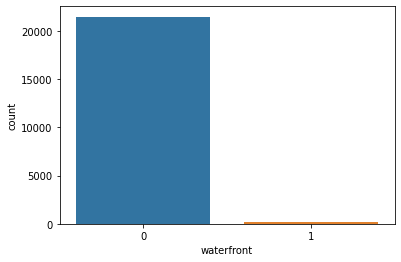

In [44]:
sns.countplot(x=df['waterfront'],data=df)
plt.show()

#most houses do not have waterfront

##### view

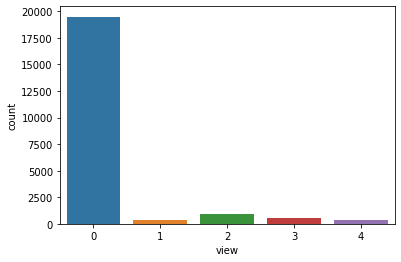

In [45]:
sns.countplot(x=df['view'],data=df)
plt.show()

#most houses have zero views

##### condition of the house

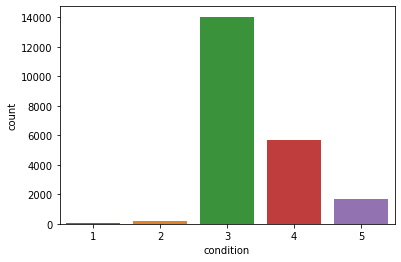

In [46]:
sns.countplot(x=df['condition'],data=df)
plt.show()

#most houses are of good condition

##### grade

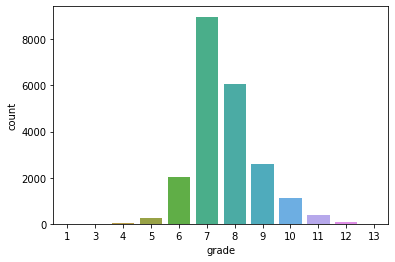

In [47]:
sns.countplot(x=df['grade'],data=df)
plt.show()

#most houses are of grade 7

## Bivariate Analysis

## Multivariate Analysis

In [48]:
## We will perform LDA 
# We will start by defining our X and Y variables
y=df[['price']]
X=df.drop(['price'],axis=1)

#we will fit LDA on the X and Y variables
lda=LDA()
lda_=lda.fit(X,y)
lda_x=lda_.transform(X)
lda_.coef_

array([[-2.56784068e+00, -4.41388739e+00,  2.59460807e-03, ...,
         2.28173598e-04,  4.99669755e-04,  3.95891925e-05],
       [-7.85773941e-01, -4.98734505e-03, -5.42769872e-04, ...,
        -2.54039129e-03,  2.67437289e-03, -2.46943421e-06],
       [-2.71218125e+00,  1.43794138e+00,  3.68535923e-04, ...,
        -2.93494980e-03,  1.66746505e-03,  4.99467636e-06],
       ...,
       [-6.50043676e+00,  1.16090470e+01,  1.50414357e-02, ...,
        -4.20188344e-03, -9.40211072e-03, -6.70655464e-06],
       [-7.49321129e+00, -4.46849342e+00,  2.25277815e-02, ...,
         7.90219034e-03, -8.64983466e-03, -7.67501300e-05],
       [-1.02027437e+01,  7.43836553e+00,  2.36780286e-02, ...,
         7.10982284e-03, -1.33844862e-02, -9.32252857e-05]])

In [49]:
#the results above are in array type
#we will convert them into a dataframe
result=pd.DataFrame(index=X.columns.values,data=lda_.coef_[0])
result.rename(columns={0:'coefficients from LDA'},inplace=True)
result.sort_values(by='coefficients from LDA',ascending=False)


# columns with positive values are best in helping to predict prices

,coefficients from LDA
yr_built,0.163947
sqft_living,0.002595
sqft_above,0.002137
sqft_basement,0.000930
sqft_living15,0.000500
yr_renovated,0.000228
sqft_lot15,0.000040
sqft_lot,-0.000005
view,-0.057915
floors,-0.475682


# MODELLING

##### Multiple Regression

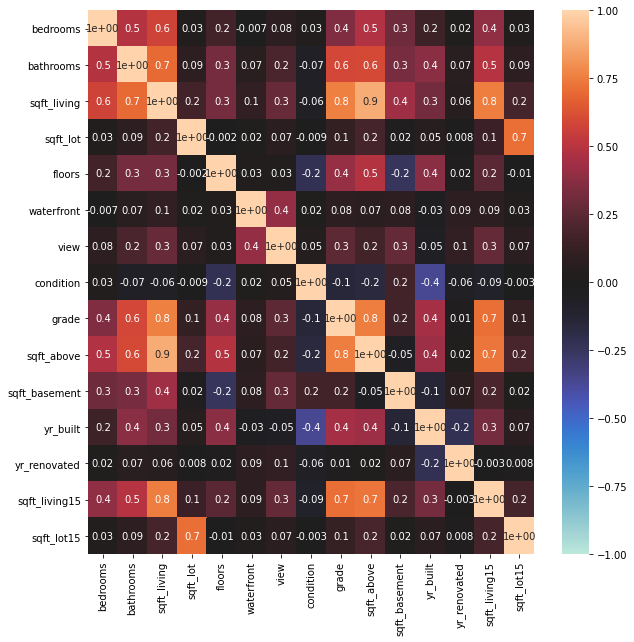

In [50]:
#declaring our X and Y variables
X=df.drop(['price'],axis=1)
y=df[['price']]
#we will check for multicollinearity in the independnent variables
#those with a high multi-colliniearuty will be dropped 
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),annot=True,fmt='.1',center=0,vmin=-1,vmax=1)
plt.show()

In [51]:
#calculating vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
#calculating vif for each feature
vif_data['VIF']=[variance_inflation_factor(X.values,i)
for i in range(len(X.columns))]

print(vif_data)

#vif above implies that there is multicollinearity

          feature         VIF
0        bedrooms   22.874263
1       bathrooms   18.110143
2     sqft_living         inf
3        sqft_lot    2.363759
4          floors   13.548336
5      waterfront    1.212417
6            view    1.518529
7       condition   29.512588
8           grade  138.384352
9      sqft_above         inf
10  sqft_basement         inf
11       yr_built  126.370481
12   yr_renovated    1.069808
13  sqft_living15   26.583647
14     sqft_lot15    2.575251


In [52]:
#we will rescale the values in the  dataframe in order to reduce the effects of 

In [53]:
#linear regreesion
lr=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
lr.fit(X_train,y_train) #fitting the model on our train data

y_pred=lr.predict(X_test)
residual=y_test-y_pred
#getting the score/performance of the model
print('r-squared : ', r2_score(y_pred,y_test)*100)
print('mean squared error: ',mean_squared_error(y_pred,y_test))
print('root mean squared error:', np.sqrt(mean_squared_error(y_pred,y_test)))


#we can see that our model does not work well in explaining the dependnent variable
# the variables used in the model, only explain 49.13% change in the dependent variable

r-squared :  49.13289242652257
mean squared error:  47284856122.569626
root mean squared error: 217450.81311084956


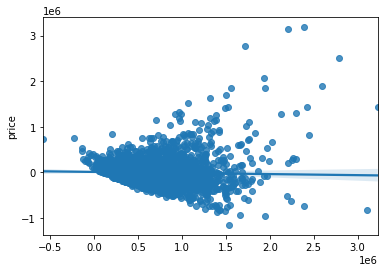

In [54]:
#plot of the residuals
sns.regplot(y=residual,x=y_pred)
plt.show()

#from the plot we can see that the residuals/ errors do not converge along a central point
#this means that the variance of the residuals are not constant and thus heteroscedastic
# this is becasue outliers receive too much weight in the model building

In [55]:
#cross validation
# we will use 5 folds
print(cross_val_score(lr,X_test,y_test,cv=5))

#we can see that the last fold has the least performance between the 5 folds
 
print('mean of cross validation of the 5 folds: ',cross_val_score(lr,X_test,y_test,cv=5).mean())

#we can see that our model does not perform better

[0.66576285 0.64641151 0.65974103 0.65609238 0.57860436]
mean of cross validation of the 5 folds:  0.6413224246124453


##### Lasso Regression

In [56]:
#lasso regression
#we will start with an alpha of 0.1
lsr=Lasso(alpha=0.1 ,normalize=True)
lsr.fit(X_train,y_train)
y_pred=lsr.predict(X_test)

#getting the score/performance of the model
print('r-squared : ', r2_score(y_pred,y_test)*100)
print('mean squared error: ',mean_squared_error(y_pred,y_test))
print('root mean squared error:', np.sqrt(mean_squared_error(y_pred,y_test)))

lsr.coef_

r-squared :  49.13341711001104
mean squared error:  47284771150.135345
root mean squared error: 217450.6177276472


array([-3.87568341e+04,  4.95361352e+04,  2.62744943e+02, -3.90762583e-03,
        2.24042518e+04,  5.95151459e+05,  4.42871291e+04,  1.91133804e+04,
        1.20233074e+05, -1.02416457e+02, -1.00106974e+02, -3.38727613e+03,
        1.36359006e+01,  2.87564317e+01, -6.19027264e-01])

In [57]:
#lasso regression
#we will start with an alpha of 0.1
lsr=Lasso(alpha=0.2 ,normalize=True)
lsr.fit(X_train,y_train)
y_pred=lsr.predict(X_test)

#getting the score/performance of the model
print('r-squared : ', r2_score(y_pred,y_test)*100)
print('mean squared error: ',mean_squared_error(y_pred,y_test))
print('root mean squared error:', np.sqrt(mean_squared_error(y_pred,y_test)))

lsr.coef_

r-squared :  49.13393677011996
mean squared error:  47284695658.78543
root mean squared error: 217450.4441448337


array([-3.87446438e+04,  4.94578645e+04,  2.31579534e+02, -3.54961234e-03,
        2.23830889e+04,  5.95042731e+05,  4.42895015e+04,  1.90902130e+04,
        1.20251821e+05, -7.11594506e+01, -6.88367446e+01, -3.38670291e+03,
        1.36098207e+01,  2.86479652e+01, -6.18929473e-01])

In [58]:
#lasso regression
#we will start with an alpha of 0.1
lsr=Lasso(alpha=0.3 ,normalize=True)
lsr.fit(X_train,y_train)
y_pred=lsr.predict(X_test)

#getting the score/performance of the model
print('r-squared : ', r2_score(y_pred,y_test)*100)
print('mean squared error: ',mean_squared_error(y_pred,y_test))
print('root mean squared error:', np.sqrt(mean_squared_error(y_pred,y_test)))

lsr.coef_

r-squared :  49.134451406876124
mean squared error:  47284629648.5199
root mean squared error: 217450.2923624613


array([-3.87324535e+04,  4.93795938e+04,  2.00414124e+02, -3.19159886e-03,
        2.23619259e+04,  5.94934002e+05,  4.42918739e+04,  1.90670457e+04,
        1.20270568e+05, -3.99024447e+01, -3.75665157e+01, -3.38612970e+03,
        1.35837409e+01,  2.85394987e+01, -6.18831681e-01])

In [59]:
#lasso regression
#we will start with an alpha of 0.1
lsr=Lasso(alpha=0.4 ,normalize=True)
lsr.fit(X_train,y_train)
y_pred=lsr.predict(X_test)

#getting the score/performance of the model
print('r-squared : ', r2_score(y_pred,y_test)*100)
print('mean squared error: ',mean_squared_error(y_pred,y_test))
print('root mean squared error:', np.sqrt(mean_squared_error(y_pred,y_test)))

lsr.coef_

r-squared :  49.13496102025343
mean squared error:  47284573119.33879
root mean squared error: 217450.1623805758


array([-3.87202632e+04,  4.93013231e+04,  1.69248715e+02, -2.83358537e-03,
        2.23407630e+04,  5.94825274e+05,  4.42942464e+04,  1.90438783e+04,
        1.20289315e+05, -8.64543874e+00, -6.29628673e+00, -3.38555649e+03,
        1.35576611e+01,  2.84310322e+01, -6.18733890e-01])

In [60]:
#lasso regression
#we will start with an alpha of 0.1
lsr=Lasso(alpha=0.5 ,normalize=True)
lsr.fit(X_train,y_train)
y_pred=lsr.predict(X_test)

#getting the score/performance of the model
print('r-squared : ', r2_score(y_pred,y_test)*100)
print('mean squared error: ',mean_squared_error(y_pred,y_test))
print('root mean squared error:', np.sqrt(mean_squared_error(y_pred,y_test)))

lsr.coef_

r-squared :  49.090023388585195
mean squared error:  47283456686.07233
root mean squared error: 217447.59526394474


array([-3.85902204e+04,  4.95230141e+04,  1.60194114e+02, -3.18846816e-03,
        2.22489785e+04,  5.94765546e+05,  4.42992954e+04,  1.90471718e+04,
        1.20204442e+05,  0.00000000e+00,  2.16695071e+00, -3.38446876e+03,
        1.35776688e+01,  2.87591871e+01, -6.17325660e-01])

- As we increase the value of alpha, the r-squared increases while the root mean square decreases.
- At an alpha of 0.5, the r-squared decreases and the root mean squared error starts going up

In [61]:
scoring={'R_squared':'r2','MSE':'neg_mean_squared_error'}
from sklearn.model_selection import GridSearchCV
def GridSearch(lsr, Features, Target, param_grid):
    for key, value in scoring.items():
        grid = GridSearchCV(lsr, param_grid, cv=10, scoring=value)
        grid.fit(Features,Target)
        print(key)
        print('The Best Parameter:', grid.best_params_)
        if grid.best_score_ > 0:
            print('The Score:', grid.best_score_)
        else:
            print('The Score:', np.sqrt(abs(grid.best_score_)))
        print()
param_grid = {'alpha':[0.01, 0.1, 1, 10, 100, 1000, 10000]}
GridSearch(lsr, X, y, param_grid)

R_squared
The Best Parameter: {'alpha': 1}
The Score: 0.6491008470894324

MSE
The Best Parameter: {'alpha': 1}
The Score: 217200.84911024582



##### Ridge Regression

In [62]:
rr=Ridge(alpha=0,normalize=True)  #an alpha of 0 gives us estimates that are same as the linear regression
rr.fit(X_train,y_train)
y_pred=rr.predict(X_test)
#getting the score/performance of the model
print('r-squared : ', r2_score(y_pred,y_test)*100)
print('mean squared error: ',mean_squared_error(y_pred,y_test))
print('root mean squared error:', np.sqrt(mean_squared_error(y_pred,y_test)))

rr.coef_

r-squared :  49.13289242657846
mean squared error:  47284856122.5697
root mean squared error: 217450.81311084973


array([[-3.87690244e+04,  4.96144060e+04,  1.01553954e+02,
        -4.26563931e-03,  2.24254147e+04,  5.95260187e+05,
         4.42847566e+04,  1.91365478e+04,  1.20214327e+05,
         5.86829364e+01,  6.09791963e+01, -3.38784934e+03,
         1.36619804e+01,  2.88648983e+01, -6.19125055e-01]])

In [63]:
rr=Ridge(alpha=0.01,normalize=True) 
rr.fit(X_train,y_train)
y_pred=rr.predict(X_test)
#getting the score/performance of the model
print('r-squared : ', r2_score(y_pred,y_test)*100)
print('mean squared error: ',mean_squared_error(y_pred,y_test))
print('root mean squared error:', np.sqrt(mean_squared_error(y_pred,y_test)))

rr.coef_

r-squared :  48.593863310072
mean squared error:  47283075077.07282
root mean squared error: 217446.71778868686


array([[-3.77346122e+04,  4.94428017e+04,  8.18344637e+01,
        -4.90696068e-03,  2.28515008e+04,  5.89999686e+05,
         4.47779142e+04,  1.96465937e+04,  1.17422040e+05,
         7.73675425e+01,  8.01751736e+01, -3.30973455e+03,
         1.49959446e+01,  3.12232110e+01, -6.10590768e-01]])

- We can see that by sightly adding the value of alpha, the model starts performing badly
- This means that the multiple linear regression is the best one to use

In [64]:
scoring={'R_squared':'r2','MSE':'neg_mean_squared_error'}
from sklearn.model_selection import GridSearchCV
def GridSearch(rr, Features, Target, param_grid):
    for key, value in scoring.items():
        grid = GridSearchCV(rr, param_grid, cv=10, scoring=value)
        grid.fit(Features,Target)
        print(key)
        print('The Best Parameter:', grid.best_params_)
        if grid.best_score_ > 0:
            print('The Score:', grid.best_score_)
        else:
            print('The Score:', np.sqrt(abs(grid.best_score_)))
        print()
param_grid = {'alpha':[0.01, 0.1, 1, 10, 100, 1000, 10000]}
GridSearch(rr, X, y, param_grid)

R_squared
The Best Parameter: {'alpha': 0.01}
The Score: 0.6491917315121423

MSE
The Best Parameter: {'alpha': 0.01}
The Score: 217186.0343945913



##### quantile regression

##### Elastic Net

In [65]:
enr=ElasticNet(alpha=1,l1_ratio=0.5,normalize=True)
enr.fit(X_train,y_train)
y_pred=enr.predict(X_test)

#getting the score/performance of the model
print('r-squared : ', r2_score(y_pred,y_test)*100)
print('mean squared error: ',mean_squared_error(y_pred,y_test))
print('root mean squared error:', np.sqrt(mean_squared_error(y_pred,y_test)))

from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(enr, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print(scores)

r-squared :  -512683744.8391958
mean squared error:  135790508086.35577
root mean squared error: 368497.63647322863
[-236093.59709833 -241787.04509815 -229045.58363243 -244676.76379285
 -233948.88280891 -229651.72470134 -229727.53406145 -227483.93731401
 -228334.0620264  -239493.29691047 -234771.4738108  -247267.15021884
 -244832.40808127 -231812.05524444 -223862.45044167 -222136.52781491
 -225897.03226145 -226972.23554563 -243287.29719917 -239387.49562864
 -241736.39867133 -232792.38161788 -236860.27324911 -226899.19725571
 -242427.25342428 -235517.04430853 -223674.35748563 -225365.9398181
 -237614.91115631 -237592.44178224]


In [66]:
scoring={'R_squared':'r2','MSE':'neg_mean_squared_error'}
from sklearn.model_selection import GridSearchCV
def GridSearch(enr, Features, Target, param_grid):
    for key, value in scoring.items():
        grid = GridSearchCV(enr, param_grid, cv=10, scoring=value)
        grid.fit(Features,Target)
        print(key)
        print('The Best Parameter:', grid.best_params_)
        if grid.best_score_ > 0:
            print('The Score:', grid.best_score_)
        else:
            print('The Score:', np.sqrt(abs(grid.best_score_)))
        print()
param_grid = {'alpha':[0.01, 0.1, 1, 10, 100, 1000, 10000]}
GridSearch(enr, X, y, param_grid)

R_squared
The Best Parameter: {'alpha': 0.01}
The Score: 0.0442132291536899

MSE
The Best Parameter: {'alpha': 0.01}
The Score: 358757.1531692043

